In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = study_results.merge(mouse_metadata, on="Mouse ID")

# Display the data table for preview
complete_data.head()
#complete_data.sort_values("Timepoint").head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [41]:
# Checking the number of mice.
len(complete_data["Mouse ID"].unique())

249

In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids



array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = complete_data[complete_data["Mouse ID"] == 'g989']	
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[complete_data["Mouse ID"] != 'g989']
clean_data.head(30)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [45]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())


248

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean().rename(index="Mean Tumor Volume")
median_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median().rename(index="Median Tumor Volume")
var_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var().rename(index="Tumor Volume Variance")
std_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std().rename(index="Tumor Volume Std. Dev.")
sem_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem().rename(index="Tumor Volume Std. Err.")

Stat_summary= pd.DataFrame(mean_tumor).merge(median_tumor, on= "Drug Regimen",
                                      ).merge(var_tumor, on= "Drug Regimen").merge(
                                      std_tumor, on= "Drug Regimen").merge(sem_tumor, on= "Drug Regimen")
Stat_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stat_sum = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
stat_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: title={'center': 'The observation count of each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of observed Mouse Timepoints'>

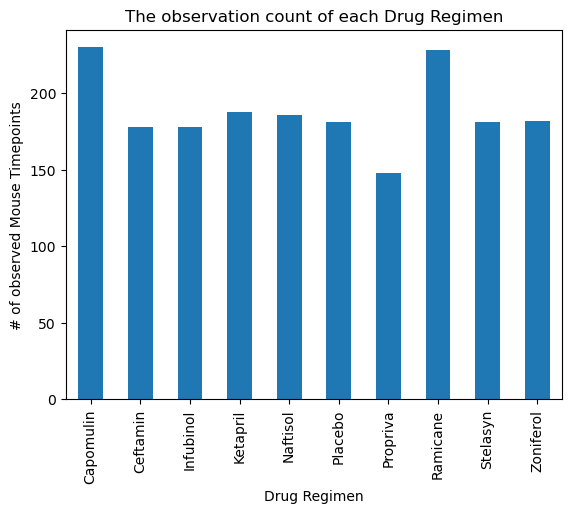

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data_to_plot = clean_data.groupby(["Drug Regimen"]).size().rename("# of observed Mouse Timepoints")

data_to_plot.plot(kind= "bar", xlabel="Drug Regimen", ylabel= "# of observed Mouse Timepoints", 
                  title= "The observation count of each Drug Regimen", )

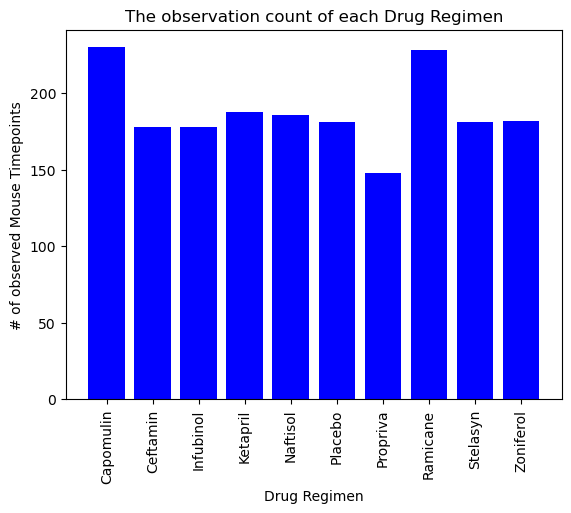

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = clean_data.groupby(["Drug Regimen"]).size()
x_axis = y_axis.index
tick_locations = x_axis
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("The observation count of each Drug Regimen")
plt.bar(x_axis, y_axis, color='b')
plt.show()

<Axes: ylabel='Sex'>

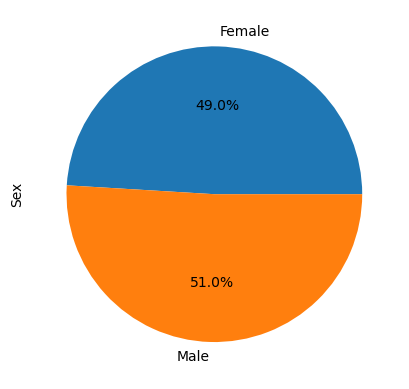

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_plot = clean_data.groupby(["Sex"]).size().rename("Sex")

pie_plot.plot(kind= "pie",  autopct="%1.1f%%")

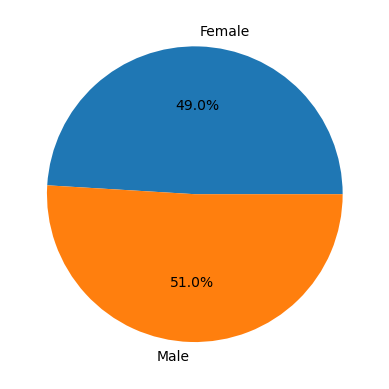

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
Gender_labels = ["Female", "Male"]

# The values of each section of the pie chart
Gender_counts = clean_data.groupby(["Sex"]).size()

# The colors of each section of the pie chart
colored = ["blue", "orange"]

plt.pie(Gender_counts, labels=Gender_labels, autopct="%1.1f%%",)
plt.show()

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max().rename("Final Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_clean_data = clean_data.merge(max_timepoint, on= "Mouse ID")


#To preview the data
merged_clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [165]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
 # Locate the rows which contain mice on each drug and get the tumor volumes
for regimens in treatments:
    filtered_merge =  merged_clean_data[merged_clean_data["Drug Regimen"] == regimens]
            
    # add subset 
    tumorvol_list.clear()
    tumorvol_list.append(filtered_merge[filtered_merge["Timepoint"] == filtered_merge["Final Timepoint"]]["Tumor Volume (mm3)"])
   
    # Determine outliers using upper and lower bounds

    quartiles = tumorvol_list[0].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    innerq = lowerq - upperq

    print(f"{regimens}'s lower quartile for Tumor Volume(mm3) f is: {lowerq}")
    print(f"{regimens}'s upper quartile for Tumor Volume (mm3) is: {upperq}")
    print(f"{regimens}'s interquartile range for Tumor Volume (mm3) is: {innerq}")
    print(f"{regimens}'s median for Tumor Volume (mm3) is: {quartiles[0.5]}")
   

    
    




The lower quartile of Tumor Volume(mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: -7.781863460000004
The lower quartile of Tumor Volume(mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: -9.098536719999998
The lower quartile of Tumor Volume(mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: -11.477135160000003
The lower quartile of Tumor Volume(mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: -15.577752179999997


In [ ]:
   fig1, (graph1, graph2, graph3,graph4) = plt.subplots(1,4)

In [39]:
max_tp_df = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df
merged_df = pd.merge(clean_data, max_tp_df, on='Mouse ID')
merged_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
95,x930,25,53.726101,0,Naftisol,Male,13,26,25
96,o725,0,45.000000,0,Naftisol,Male,4,26,15
97,o725,5,46.889821,0,Naftisol,Male,4,26,15
98,o725,10,48.199452,0,Naftisol,Male,4,26,15
